# CNN for acoustic scene classfication: my life environment

Date: March 20, 2019

Neural network: input MFSCs to CNN

Location: Yokohama, Japan

## Preparing data set for CNN

In [54]:
DATASET_FOLDER = '../dataset/data_environment'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=False)
shape = ds.shape
class_labels = ds.class_labels
class_labels

['silence', 'train', 'station', 'fastfood', 'escalator', 'mall', 'ship']

((980, 64, 40, 1), (420, 64, 40, 1))

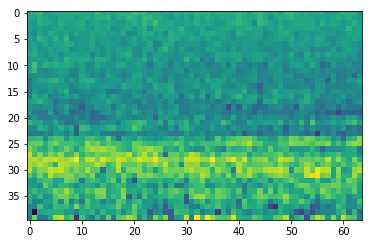

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)))
train_data.shape, test_data.shape

### CNN model

In [56]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 19, 8)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 8, 16)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 6, 32)         4640      
__________

In [57]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

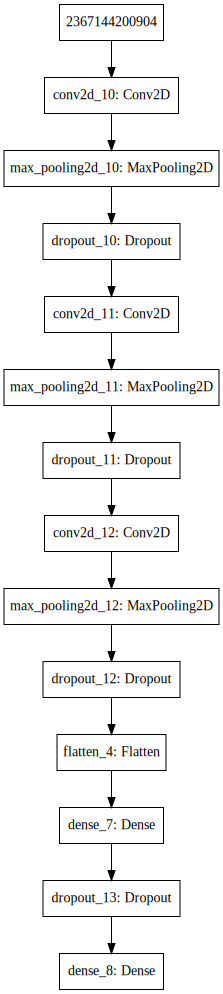

In [58]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [59]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 980 samples, validate on 420 samples
Epoch 1/50
980/980 [==============================] - 35s 36ms/step - loss: 1.6737 - acc: 0.3306 - val_loss: 1.3414 - val_acc: 0.5429
Epoch 2/50
980/980 [==============================] - 32s 33ms/step - loss: 1.2647 - acc: 0.4918 - val_loss: 1.1062 - val_acc: 0.6024
Epoch 3/50
980/980 [==============================] - 32s 33ms/step - loss: 1.0904 - acc: 0.5959 - val_loss: 0.9603 - val_acc: 0.6310
Epoch 4/50
980/980 [==============================] - 32s 33ms/step - loss: 0.9383 - acc: 0.6561 - val_loss: 0.8160 - val_acc: 0.7619
Epoch 5/50
980/980 [==============================] - 33s 33ms/step - loss: 0.8538 - acc: 0.6714 - val_loss: 0.7444 - val_acc: 0.7357
Epoch 6/50
980/980 [==============================] - 32s 32ms/step - loss: 0.7872 - acc: 0.7051 - val_loss: 0.7247 - val_acc: 0.7429
Epoch 7/50
980/980 [==============================] - 32s 33ms/step - loss: 0.7122 - acc: 0.7561 - val_loss: 0.6219 - val_acc: 0.8000
Epoch 8/50
980/9

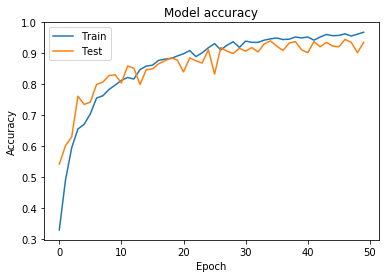

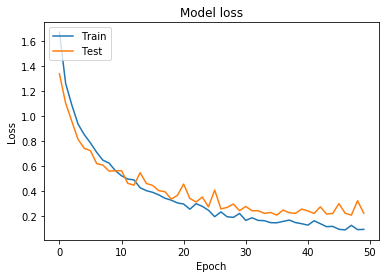

In [60]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [61]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_environment{}.h5'.format(dt)
model.save(filename)

## Load the model

In [62]:
del model
model = models.load_model(filename)

## Confirmation

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [65]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [66]:
class_labels

['silence', 'train', 'station', 'fastfood', 'escalator', 'mall', 'ship']

In [67]:
(activations[-1][:10]*100).astype(int)

array([[  0,   0,   0,   0,   0,   0,  99],
       [100,   0,   0,   0,   0,   0,   0],
       [  0,  99,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  99,   0,   0],
       [  0,  99,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  99],
       [  0,   0,   0,   0,   0,   0, 100],
       [100,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0]])

In [68]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0]])

In [69]:
%run ./plot_layer.py

'ship'

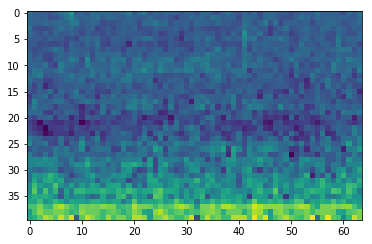

In [71]:
image_number = 55

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

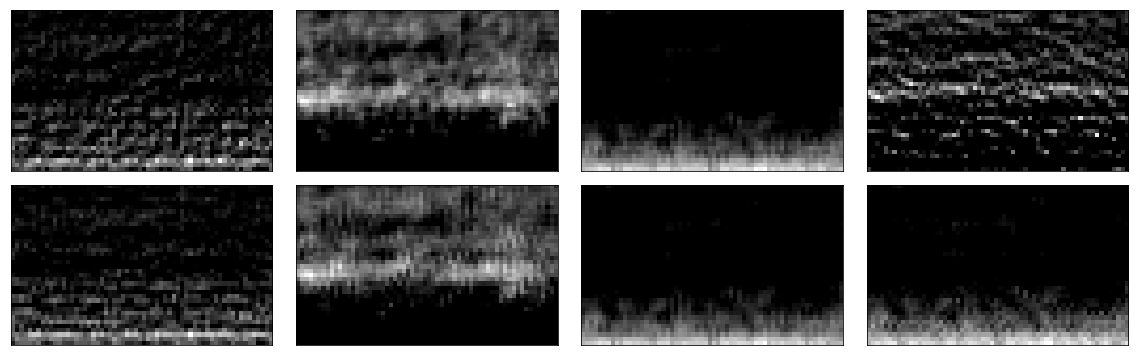

In [72]:
plot_layer(activations, image_number, 0, 4)

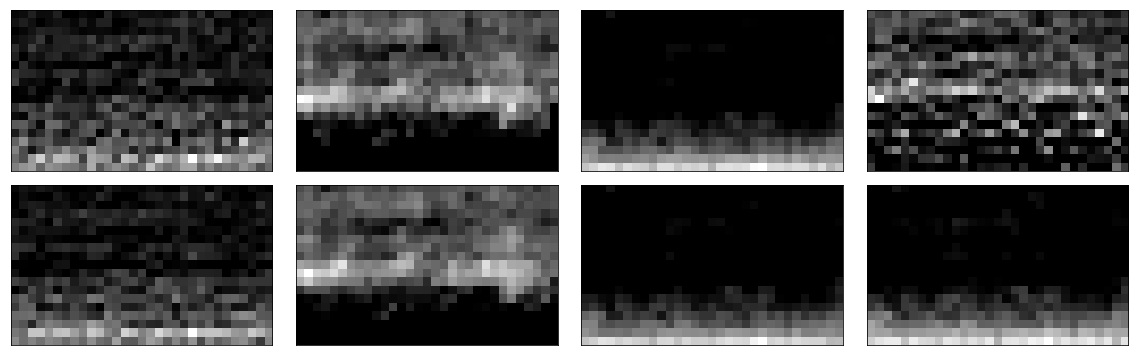

In [73]:
plot_layer(activations, image_number, 1, 4)

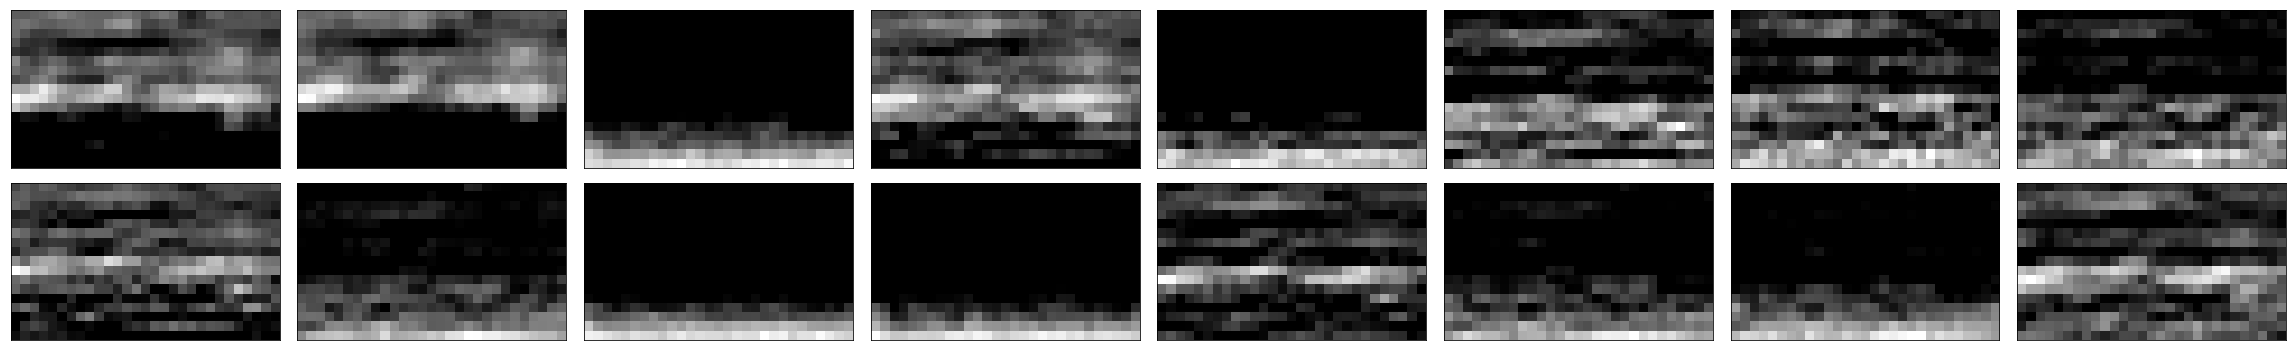

In [74]:
plot_layer(activations, image_number, 3, 8)

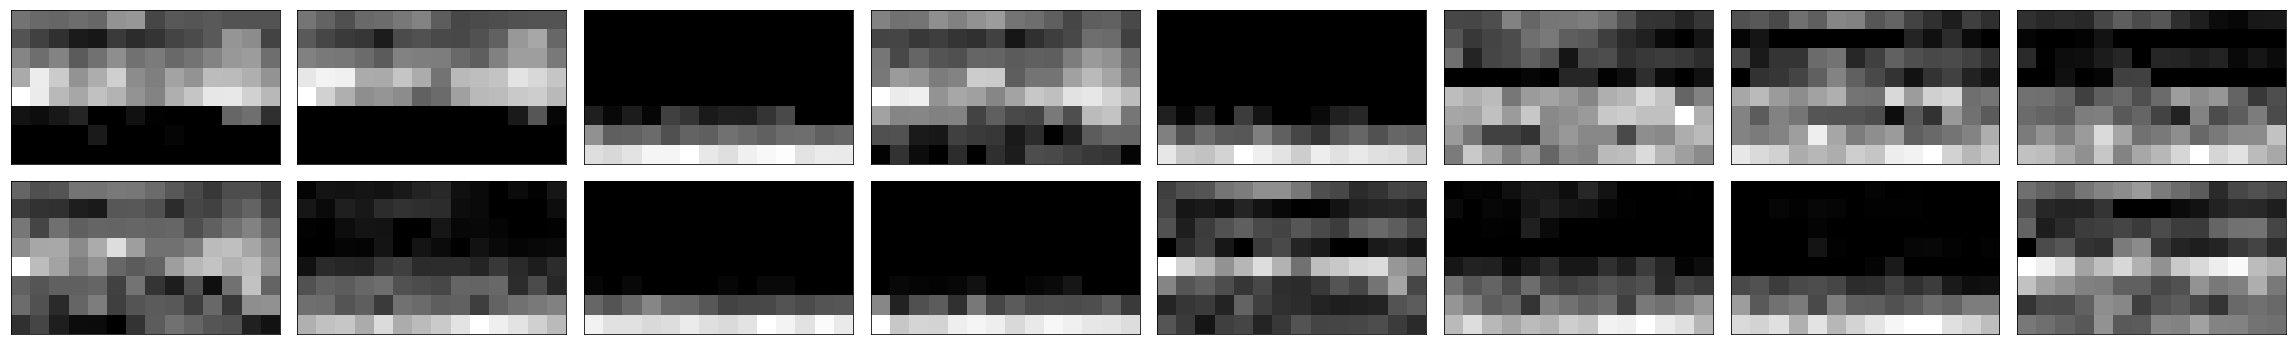

In [75]:
plot_layer(activations, image_number, 4, 8)

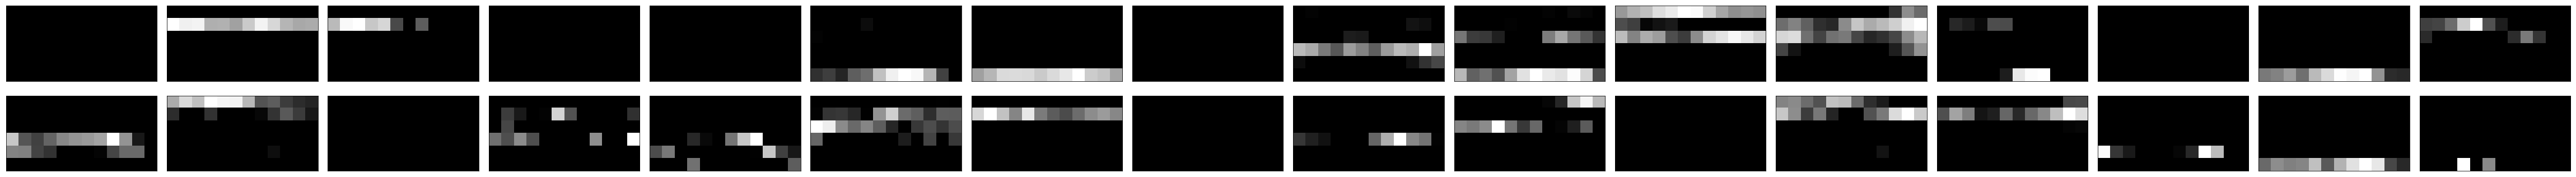

In [76]:
plot_layer(activations, image_number, 6, 16)

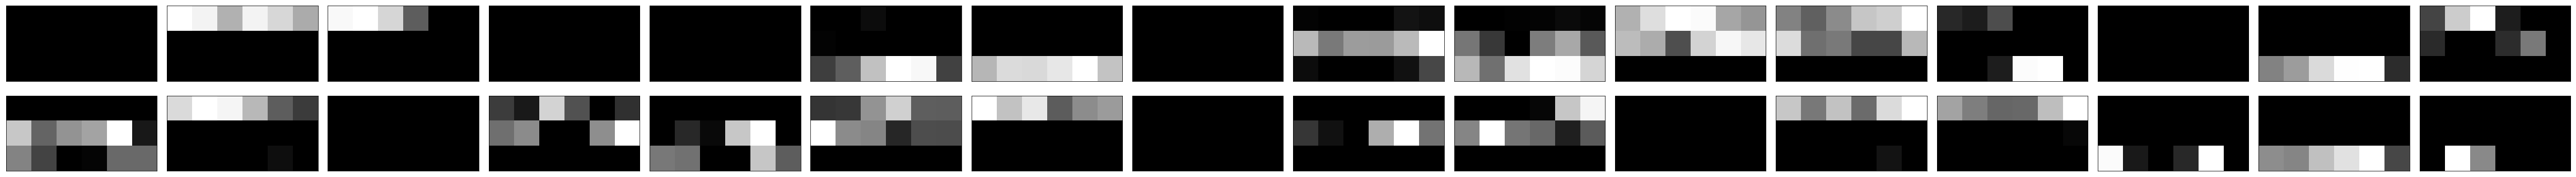

In [77]:
plot_layer(activations, image_number, 7, 16)